In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import time

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dir = "//content/drive/MyDrive/Assignment_HOOM/"

In [ ]:
df = pd.read_csv(dir + 'DEXUSEU.csv')
df

,DATE,DEXUSEU
0,2000-01-03,1.0155
1,2000-01-04,1.0309
2,2000-01-05,1.0335
3,2000-01-06,1.0324
4,2000-01-07,1.0294
...,...,...
5905,2022-08-22,0.9936
5906,2022-08-23,0.9976
5907,2022-08-24,0.9967
5908,2022-08-25,0.9959


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5910 entries, 0 to 5909
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   DATE     5910 non-null   datetime64[ns]
 1   DEXUSEU  5683 non-null   float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 92.5 KB


In [ ]:
df['DATE'] = pd.to_datetime(df['DATE'])
df['DEXUSEU'] = pd.to_numeric(df['DEXUSEU'], errors='coerce')

In [ ]:
df.isnull().sum()

DATE         0
DEXUSEU    227
dtype: int64

In [ ]:
df[df['DEXUSEU'].isnull()]

,DATE,DEXUSEU
10,2000-01-17,NaN
35,2000-02-21,NaN
105,2000-05-29,NaN
131,2000-07-04,NaN
175,2000-09-04,NaN
...,...,...
5750,2022-01-17,NaN
5775,2022-02-21,NaN
5845,2022-05-30,NaN
5860,2022-06-20,NaN


In [ ]:
df.dropna(how = 'any',inplace=True)
df

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


,DATE,DEXUSEU
0,2000-01-03,1.0155
1,2000-01-04,1.0309
2,2000-01-05,1.0335
3,2000-01-06,1.0324
4,2000-01-07,1.0294
...,...,...
5905,2022-08-22,0.9936
5906,2022-08-23,0.9976
5907,2022-08-24,0.9967
5908,2022-08-25,0.9959


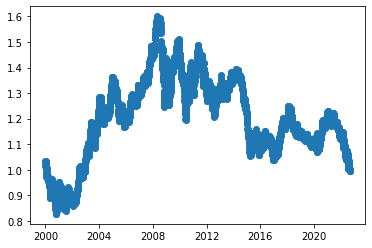

In [ ]:
plt.scatter(df.DATE, df.DEXUSEU)
plt.show()

In [ ]:
from scipy import stats
import numpy as np
df[(np.abs(stats.zscore(df['DEXUSEU'])) > 3)]

,DATE,DEXUSEU


In [57]:
average = df.groupby(pd.PeriodIndex(df['DATE'], freq = "M"))['DEXUSEU'].mean()
average = average.to_frame()
average

,DEXUSEU
DATE,
2000-01,1.013110
2000-02,0.983360
2000-03,0.964339
2000-04,0.944920
2000-05,0.905945
...,...
2022-04,1.080295
2022-05,1.056719
2022-06,1.056719


In [ ]:
average.info()

<class 'pandas.core.frame.DataFrame'>
PeriodIndex: 272 entries, 2000-01 to 2022-08
Freq: M
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   DEXUSEU  272 non-null    float64
dtypes: float64(1)
memory usage: 4.2 KB


In [58]:
average = average.reset_index()

In [ ]:
average.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype    
---  ------   --------------  -----    
 0   DATE     272 non-null    period[M]
 1   DEXUSEU  272 non-null    float64  
dtypes: float64(1), period[M](1)
memory usage: 4.4 KB


In [59]:
average['DATE'] = average['DATE'].astype(str)
average['DATE'] = pd.to_datetime(average['DATE'])

In [ ]:
average

,DATE,DEXUSEU
0,2000-01-01,1.013110
1,2000-02-01,0.983360
2,2000-03-01,0.964339
3,2000-04-01,0.944920
4,2000-05-01,0.905945
...,...,...
267,2022-04-01,1.080295
268,2022-05-01,1.056719
269,2022-06-01,1.056719
270,2022-07-01,1.016825


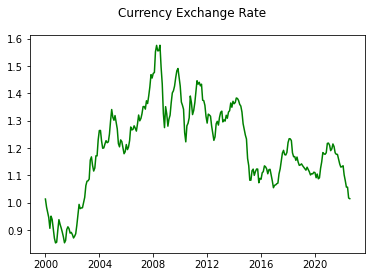

In [60]:
plt.plot(average['DATE'], average['DEXUSEU'], "g-")

plt.suptitle("Currency Exchange Rate")
plt.show()

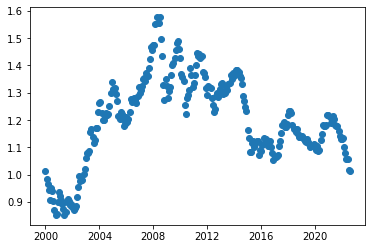

In [61]:
plt.scatter(average.DATE, average.DEXUSEU)
plt.show()

In [62]:
average.set_index(['DATE'],inplace = True)
average

,DEXUSEU
DATE,
2000-01-01,1.013110
2000-02-01,0.983360
2000-03-01,0.964339
2000-04-01,0.944920
2000-05-01,0.905945
...,...
2022-04-01,1.080295
2022-05-01,1.056719
2022-06-01,1.056719


In [63]:
average.to_csv('currency_exchange_rate_final.csv')